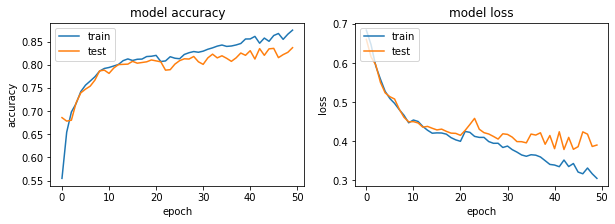

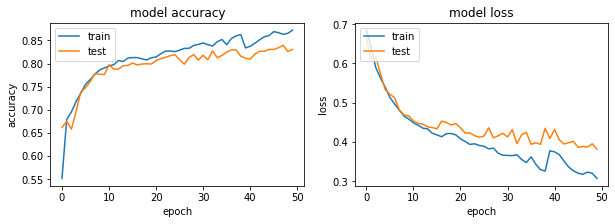

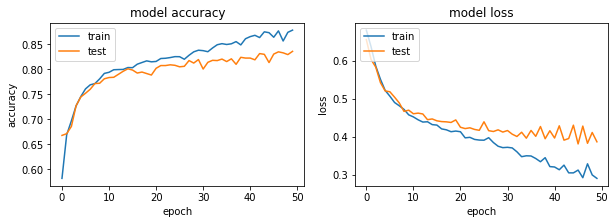

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

def show_training_history(file_path):
    histories=np.loadtxt(file_path, delimiter=",")
    f = plt.figure(figsize=(10,3))

    f.add_subplot(1,2, 1)
    plt.plot(histories[:, 1])
    plt.plot(histories[:, 3])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # plt.show()

    # summarize history for loss
    f.add_subplot(1,2, 2)
    plt.plot(histories[:, 0])
    plt.plot(histories[:, 2])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
show_training_history("./model/bi-direct-1-50-history.txt")
print()
show_training_history("./model/bi-direct-3-50-history.txt")
print()
show_training_history("./model/bi-direct-5-50-history.txt")

In [81]:
def load_data(net, epochs):
    tr_losses , tr_acc, te_losses, te_acc = [], [], [], []
    start = 1 if net=='lstm' or net =='rnn' else 0
    end = 21 if net=='lstm' else 30
    for i in range(start, end):
        histories=np.loadtxt("./model/{}-{}-{}-history.txt".format(net,i, epochs), delimiter=",")
        if net=='bi-direct':
            tr_losses.append(np.repeat(histories[:, 0], 3))
            tr_acc.append(np.repeat(histories[:, 1], 3))
            te_losses.append(np.repeat(histories[:, 2], 3))
            te_acc.append(np.repeat(histories[:, 3],3 ))
        elif (net=='lstm' and (i == 4 or i==5)):
            pass
        else:
#             print(histories[:, 0].shape)
            tr_losses.append(histories[:, 0])
            tr_acc.append(histories[:, 1])
            te_losses.append(histories[:, 2])
            te_acc.append(histories[:, 3])
            
        
    tr_losses = np.expand_dims(np.array(tr_losses), axis=-1)
    tr_acc    = np.expand_dims(np.array(tr_acc), axis=-1)
    te_losses = np.expand_dims(np.array(te_losses), axis=-1)
    te_acc    = np.expand_dims(np.array(te_acc), axis=-1)
    return  tr_losses , tr_acc, te_losses, te_acc
load_data('lstm', 150)[0].shape     
# load_data('bi-direct', 50)[0].shape

(18, 150, 1)

/home/hajau/KE/x
(29, 150)


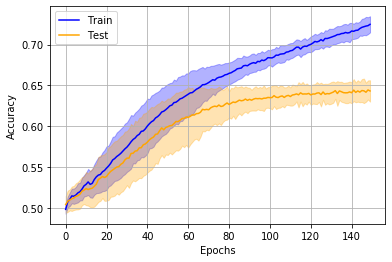

In [84]:
import os
import numpy as np
import matplotlib.pyplot as plt

print(os.getcwd())

def gen_chart():
    results1 = load_data('rnn', 150)[1]
    results2 = load_data('rnn', 150)[3]
    
#     f = plt.figure(figsize=(10,3))

#     fig, axes = f.add_subplot(1,2, 1)
    fig, axes = plt.subplots(1, 1)
    ax = axes

    # ARS
    result = results1[:,:, 0]
    print(result.shape)
    mu = np.mean(result, axis = 0)
    sigma = np.std(result, axis = 0)
    x = np.arange(result.shape[1])

    line1, = ax.plot(x, mu, color = "blue")
    ax.fill_between(x, mu + sigma, mu - sigma, color = "blue", alpha = 0.3)

    # MFARSRR
    result = results2[:, :, 0]

    mu = np.mean(result, axis = 0)
    sigma = np.std(result, axis = 0)
    x = np.arange(result.shape[1])

    line2, = ax.plot(x, mu, color = "orange")
    ax.fill_between(x, mu + sigma, mu - sigma, color = "orange", alpha = 0.3)

    # Legend
    ax.grid()
    ax.legend((line1, line2), ("Train", "Test"))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
#     plt.savefig("mean_and_std.eps", format = "eps")

gen_chart()    

/home/hajau/KE/x
(30, 150)


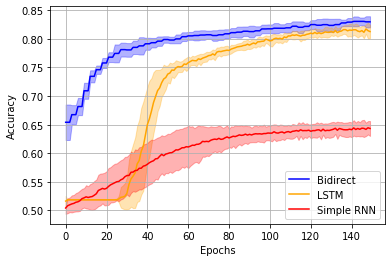

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

print(os.getcwd())

def compare_model():
    results1 = load_data('bi-direct', 50)[3]
    results2 = load_data('lstm', 150)[3]
    results3 = load_data('rnn', 150) [3]
#     f = plt.figure(figsize=(10,3))

#     fig, axes = f.add_subplot(1,2, 1)
    fig, axes = plt.subplots(1, 1)
    ax = axes


    result = results1[:,:, 0]
    print(result.shape)
    mu = np.mean(result, axis = 0)
    sigma = np.std(result, axis = 0)
    x = np.arange(result.shape[1])

    line1, = ax.plot(x, mu, color = "blue")
    ax.fill_between(x, mu + sigma, mu - sigma, color = "blue", alpha = 0.3)


    result = results2[:, :, 0]

    mu = np.mean(result, axis = 0)
    sigma = np.std(result, axis = 0)
    x = np.arange(result.shape[1])

    line2, = ax.plot(x, mu, color = "orange")
    ax.fill_between(x, mu + sigma, mu - sigma, color = "orange", alpha = 0.3)
    
    result = results3[:, :, 0]

    mu = np.mean(result, axis = 0)
    sigma = np.std(result, axis = 0)
    x = np.arange(result.shape[1])

    line3, = ax.plot(x, mu, color = "red")
    ax.fill_between(x, mu + sigma, mu - sigma, color = "red", alpha = 0.3)
    
    

    # Legend
    ax.grid()
    ax.legend((line1, line2, line3), ("Bidirect", "LSTM", "Simple RNN"))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
#     plt.savefig("mean_and_std.eps", format = "eps")

compare_model()